In [1]:
import data_catalog
import tseries_mod
from utils_plot import plot_1ds

%matplotlib inline

In [2]:
data_catalog.set_catalog('experiments')

active catalog: experiments


In [3]:
varnames = ['NBP']

In [4]:
experiment = 'historical'
ds_expr_ann = tseries_mod.tseries_get_vars(varnames, 'lnd', experiment, freq='ann')
# print(ds_expr_ann)

In [5]:
# load Dataset for corresponding parent_experiment
parent_experiment = data_catalog.find_in_index(experiment=experiment).parent_experiment.unique()[0]
print(parent_experiment)
ds_parent_ann = tseries_mod.tseries_get_vars(varnames, 'lnd', parent_experiment, freq='ann')
# print(ds_parent_ann)

piControl


In [6]:
# construct year range of parent_experiment to use for detrending
branch_years = data_catalog.find_in_index(experiment=experiment).parent_branch_year.unique()
yr_lo = branch_years.min() - 50
yyyymmdd_lo = f'{yr_lo:04d}-01-01'
yr_hi = branch_years.max() + 50 + len(ds_expr_ann.time)
yyyymmdd_hi = f'{yr_hi:04d}-01-01'
print((yyyymmdd_lo, yyyymmdd_hi))

('0451-01-01', '1086-01-01')


In [7]:
# compute parent_experiment mean, for detrending
ds_parent_ann_slice_mean = ds_parent_ann.sel(time=slice(yyyymmdd_lo, yyyymmdd_hi)).mean(dim='time')
print(ds_parent_ann_slice_mean.NBP)

<xarray.DataArray 'NBP' (region: 1)>
array([-0.0243774], dtype=float32)
Coordinates:
  * region   (region) object 'Global'
Attributes:
    long_name:     Integrated net biome production, includes fire, landuse, h...
    units:         Pg yr-1
    cell_methods:  time: mean


In [8]:
ds_expr_ann_detrended = ds_expr_ann - ds_parent_ann_slice_mean

In [9]:
# add cummulate flux vars to datasets
# for ds in [ds_expr_ann, ds_expr_ann_detrended]:
for ds in [ds_expr_ann, ds_expr_ann_detrended]:
    for varname in varnames:
        da = ds[varname].cumsum(dim='time', keep_attrs=True)
        da.name = varname+'_CUM'
        da.attrs['units'] = 'Pg'
        ds[da.name] = da

# print(ds_expr_ann)
# print(ds_expr_ann_detrended)

array([1.5862049 , 0.30143383, 0.7016919 , 1.5392824 , 0.7782162 ,
       0.53285694, 2.3604856 , 0.89829767, 1.4477971 , 1.256076  ,
       1.635122  ], dtype=float32)

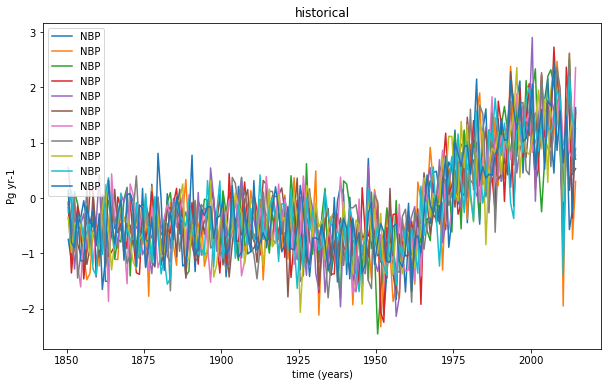

In [10]:
plot_1ds(ds_expr_ann, ['NBP'], title=experiment, region_val='Global')
ds_expr_ann['NBP'].sel(region='Global').isel(time=-1).values

array([-32.625477, -35.636967, -30.785646, -34.654255, -34.612293,
       -34.35539 , -28.816408, -30.566147, -30.697565, -33.113216,
       -29.177525], dtype=float32)

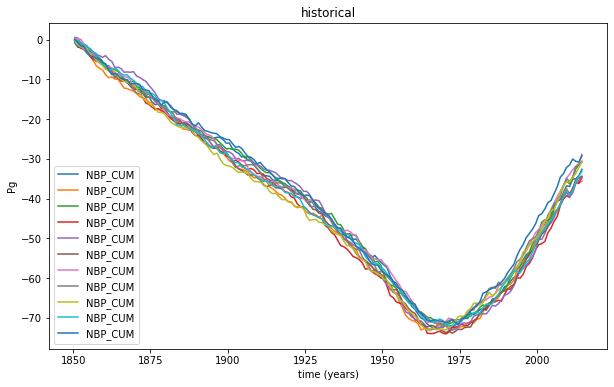

In [11]:
plot_1ds(ds_expr_ann, ['NBP_CUM'], title=experiment, region_val='Global')
ds_expr_ann['NBP_CUM'].sel(region='Global').isel(time=-1).values

array([-28.603182, -31.614693, -26.76337 , -30.631947, -30.590017,
       -30.333094, -24.794117, -26.543911, -26.675323, -29.090984,
       -25.15526 ], dtype=float32)

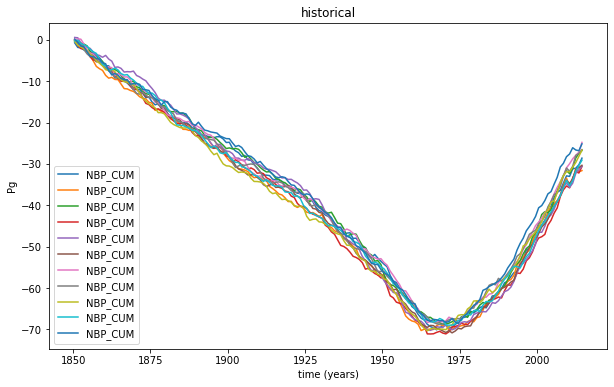

In [12]:
plot_1ds(ds_expr_ann_detrended, ['NBP_CUM'], title=experiment, region_val='Global')
ds_expr_ann_detrended['NBP_CUM'].sel(region='Global').isel(time=-1).values